# Quick usage examples for PyDSD #
This notebook shows some (very) brief examples of current PyDSD functionality and how to interact with it.

## NASA GV Field Campaign Parsivel Format ##
Let's start with a NASA Ground Validation Parsivel formatted file. We've downloaded this from the HyDRO search for the iFloodS field campaign. 

In [1]:
%matplotlib inline

import pydsd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pydsd.plot

In [2]:
filename = '/Users/hard505/Downloads/ifloods_apu01_20130502_N421419.54_W922749.33_rainDSD.txt' #Parsivel 05, March 2nd

Reading in files is quite easy. There are several readers in pydsd in either `pydsd.io` or `pydsd.io.aux_readers` depending on their level of support. In this case we will use the `read_parsivel_nasa_gv` function, and pass an argument telling it which campaign this is. This is to support some of the changing file formats during nasa's campaign. 

In [3]:
dsd = pydsd.read_parsivel_nasa_gv(filename, campaign='ifloods')

So at this point we have the drop size distribution read in. NASA strips out rainfall information though and stores it in a separate file so we will want to handle that at some point. 
Let's calculate what some of the DSD parameters are. We will estimate parameters of a normalized gamma, an exponential, as well as a few supplemental parameters. 

In [4]:
dsd.calculate_dsd_parameterization()

Each of these parameters is calculated and stored on the dsd object in a dictionary called fields. Each of the fields should have the data, units, and any other auxillary information about the parameter. Let's look at the current list of these. 

In [5]:
dsd.fields.keys()

dict_keys(['Nd', 'D0', 'Dmax', 'Dm', 'Nt', 'Nw', 'N0', 'W', 'mu', 'Lambda'])

And we can dig down further and see what is in one of these objects. 

In [6]:
dsd.fields['D0']

{'standard_name': 'median_drop_diameter',
 'units': 'mm',
 'long_name': 'Median Drop Diameter',
 'data': masked_array(data=[1.05044172, 1.00717798, 0.9271987 , 0.84906312,
                    0.76371447, 0.71844115, 0.65176375, 0.69932754,
                    0.61767797, 0.50243424, 0.53135984, 0.56358002,
                    1.05731982, 0.89245016, 0.90639239, 0.90106529,
                    0.77053378, 0.76441474, 0.75131511, 0.69598596,
                    0.66201703, 0.63045703, 0.62993463, 0.63209366,
                    0.56250375, 0.52237415, 0.5114849 , 0.51089024,
                    0.50978824, 0.53993716, 0.52529797, 0.46634357,
                    0.44258101, 0.43567515, 0.40266181, 0.38996854,
                    0.39366428, 0.40305257, 0.37962542, 0.94611453,
                    0.87649146, 0.87965814, 0.72063401, 0.77244156,
                    0.75407617, 0.69883763, 0.69045428, 0.66021129,
                    0.64339105, 0.63348575, 0.6518258 , 0.66446841,
            

There are also several built in parameters for plotting in PyDSD that are listed in the documentation. These can be found in the `pydsd.plot` module. Let's use the `plot_ts` function to plot D0 and look at it. 

(<matplotlib.axes._subplots.AxesSubplot at 0x11d3eb7b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11d3eb7b8>)

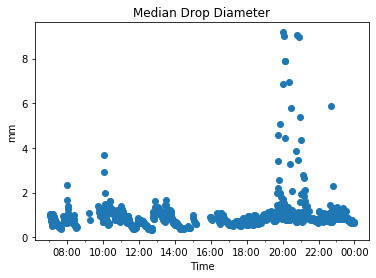

In [7]:
pydsd.plot.plot_ts(dsd, 'D0', x_min_tick_format='hour')


We can pass in our on figure our axis if we'd like. 

(<matplotlib.axes._subplots.AxesSubplot at 0x11d389cf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11d389cf8>)

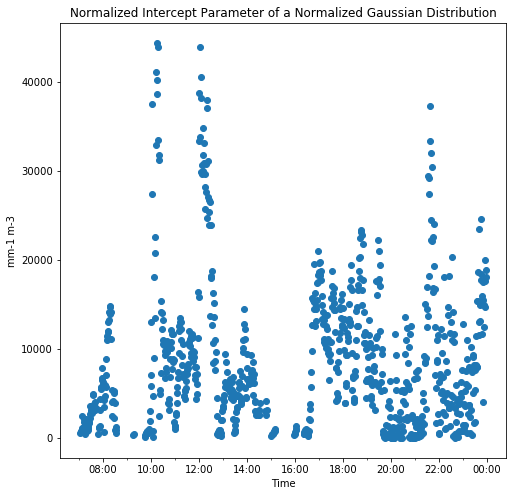

In [8]:
fig = plt.figure(figsize=(8,8))
pydsd.plot.plot_ts(dsd, 'Nw', x_min_tick_format='hour')



Similarly we can visualize the actual drop size distribution itself. It is stored in the Nd field. We also have a plotting function for this. 

(<Figure size 576x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11d364ac8>)

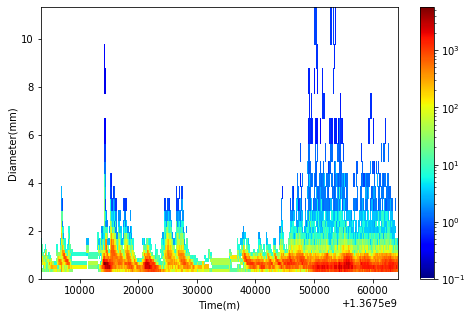

In [9]:
fig = plt.figure(figsize=(8,5))
pydsd.plot.plot_dsd(dsd, fig=fig)

We can make side by side plots too. 

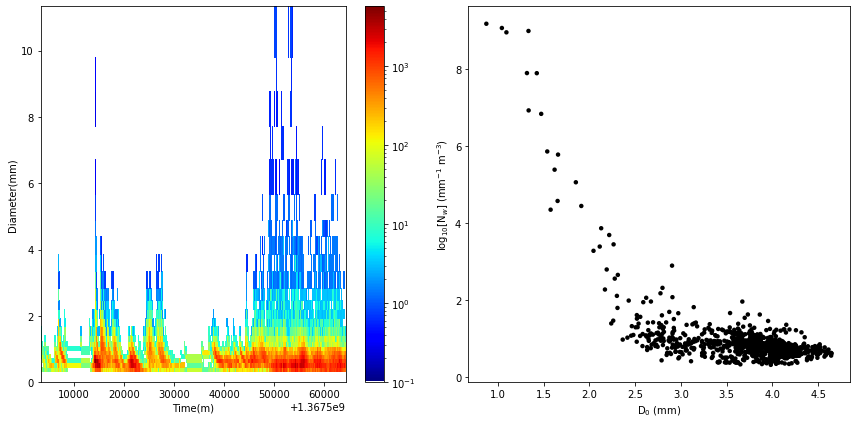

In [10]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
pydsd.plot.plot_dsd(dsd, ax=ax)

ax = plt.subplot(1,2,2)
pydsd.plot.plot_NwD0(dsd,  ax=ax)
plt.tight_layout()

We can calculate radar parameters as well. Let's look at what these measurements would look like if we did T-Matrix scatttering at X-band, which is the default. 

In [11]:
dsd.calculate_radar_parameters()

This assumes BC shape relationship, X band, 10C. You can pass in a new wavelength to change that.
 Let's plot some of the parameters, and then try to do something with the data.

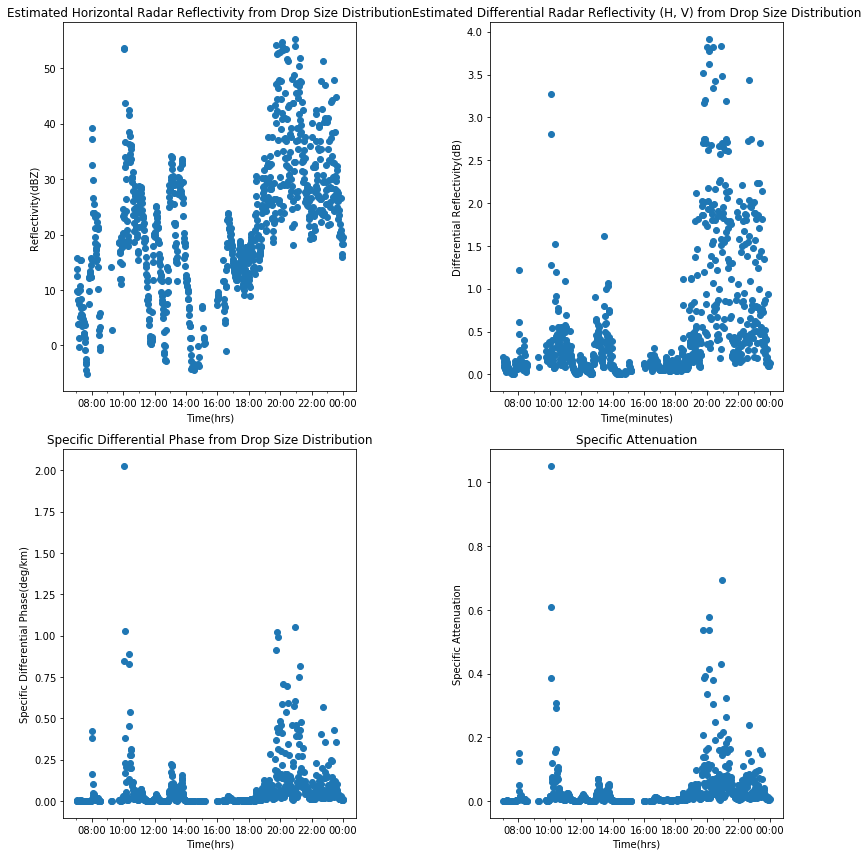

In [12]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
pydsd.plot.plot_ts(dsd, 'Zh', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('Reflectivity(dBZ)')
# plt.xlim(5,24)

plt.subplot(2,2,2)
pydsd.plot.plot_ts(dsd, 'Zdr', x_min_tick_format='hour')

plt.xlabel('Time(minutes)')
plt.ylabel('Differential Reflectivity(dB)')
# plt.xlim(5,24)

plt.subplot(2,2,3)
pydsd.plot.plot_ts(dsd, 'Kdp', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('Specific Differential Phase(deg/km)')
# plt.xlim(5,24)

plt.subplot(2,2,4)
pydsd.plot.plot_ts(dsd, 'Ai', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('Specific Attenuation')
# plt.xlim(5,24)

plt.tight_layout()

plt.show()

Next let's estimate some microphysical parameterizations.

In [13]:
dsd.calculate_dsd_parameterization()

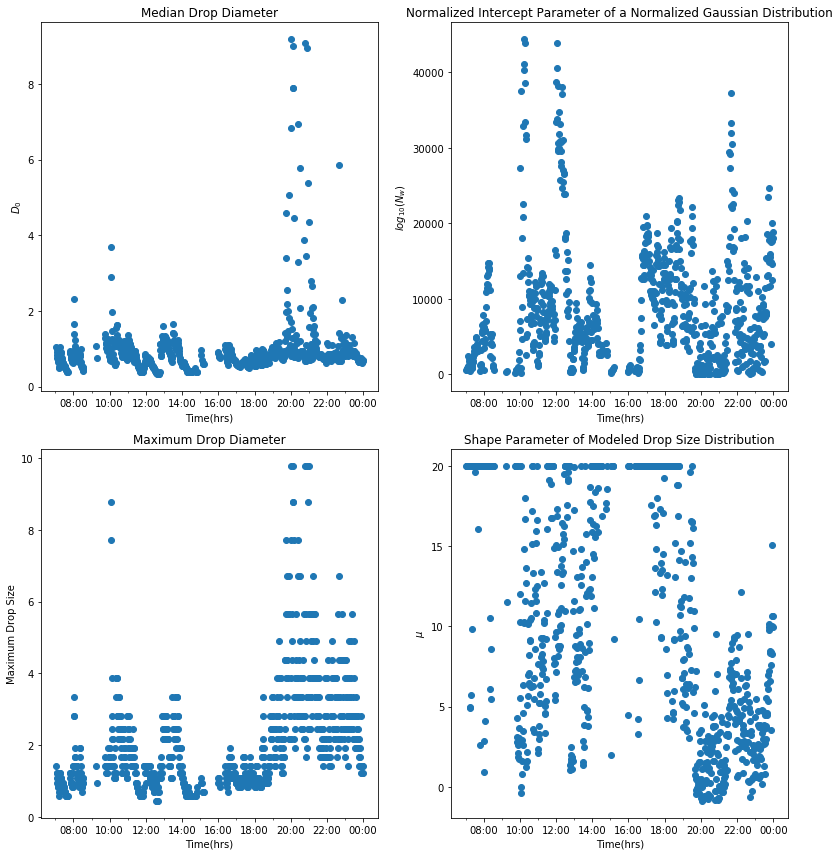

In [14]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
pydsd.plot.plot_ts(dsd, 'D0', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('$D_0$')
# plt.xlim(5,24)

plt.subplot(2,2,2)
pydsd.plot.plot_ts(dsd, 'Nw', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('$log_{10}(N_w)$')
# plt.xlim(5,24)

plt.subplot(2,2,3)
pydsd.plot.plot_ts(dsd, 'Dmax', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('Maximum Drop Size')
# plt.xlim(5,24)

plt.subplot(2,2,4)
pydsd.plot.plot_ts(dsd, 'mu', x_min_tick_format='hour')

plt.xlabel('Time(hrs)')
plt.ylabel('$\mu$')

plt.tight_layout()

plt.show()